In [3]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [5]:
ROOT_PATH = '/host//Can/dpr/'
train_data_directory = os.path.join(ROOT_PATH, "outPut3/train")
#test_data_directory = os.path.join(ROOT_PATH, "outPut/val")

In [6]:
Images,Labels= load_data(train_data_directory)

(array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([ 0.        ,  0.86111111,  1.72222222,  2.58333333,  3.44444444,
         4.30555556,  5.16666667,  6.02777778,  6.88888889,  7.75      ,
         8.61111111,  9.47222222, 10.33333333, 11.19444444, 12.05555556,
        12.91666667, 13.77777778, 14.63888889, 15.5       , 16.36111111,
        17.22222222, 18.08333333, 18.94444444, 19.80555556, 20.66666667,
        21.52777778, 22.38888889, 23.25      , 24.11111111, 24.97222222,
        25.83333333, 26.69444444, 27.55555556, 28.41666667, 29.27777778,
        30.13888889, 31.        ]),
 <a list of 36 Patch objects>)

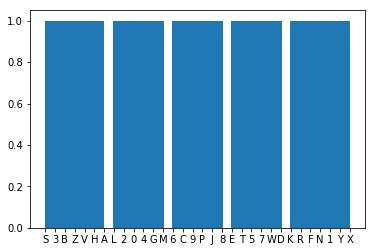

In [7]:
plt.hist(Labels,36)

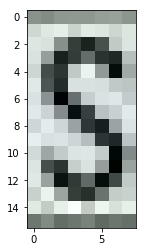

In [7]:
imgplot = plt.imshow(Images[0])


In [8]:

Labels

['S',
 '3',
 'B',
 'Z',
 'V',
 'H',
 'A',
 'L',
 '2',
 '0',
 '4',
 'G',
 'M',
 '6',
 'C',
 '9',
 'P',
 'J',
 '8',
 'E',
 'T',
 '5',
 '7',
 'W',
 'D',
 'K',
 'R',
 'F',
 'N',
 '1',
 'Y',
 'X']

In [8]:
iii = Images[0][1,1]

In [9]:
print(iii)


[223 233 225]


In [9]:
#add value 15 in hsv images,yellow will change into green
i=0
random.uniform(-1,1)

for p in range(0,32*1):
    
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    for j in range(1,41):
        #40images add 1 on hue
        turn_green_hsv = img_hsv.copy()
        turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+j*1) % 180
        turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
        filename=train_data_directory+ '/' + Labels[i] + '/' + Labels[i]+'_hsv_h'+str(j)+'.jpg'
        plt.imsave(filename, turn_green_img)
    print(filename)
    i+=1


/host//Can/dpr/outPut2/train/S/S_hsv_h40.jpg
/host//Can/dpr/outPut2/train/3/3_hsv_h40.jpg
/host//Can/dpr/outPut2/train/B/B_hsv_h40.jpg
/host//Can/dpr/outPut2/train/Z/Z_hsv_h40.jpg
/host//Can/dpr/outPut2/train/V/V_hsv_h40.jpg
/host//Can/dpr/outPut2/train/H/H_hsv_h40.jpg
/host//Can/dpr/outPut2/train/A/A_hsv_h40.jpg
/host//Can/dpr/outPut2/train/L/L_hsv_h40.jpg
/host//Can/dpr/outPut2/train/2/2_hsv_h40.jpg
/host//Can/dpr/outPut2/train/0/0_hsv_h40.jpg
/host//Can/dpr/outPut2/train/4/4_hsv_h40.jpg
/host//Can/dpr/outPut2/train/G/G_hsv_h40.jpg
/host//Can/dpr/outPut2/train/M/M_hsv_h40.jpg
/host//Can/dpr/outPut2/train/6/6_hsv_h40.jpg
/host//Can/dpr/outPut2/train/C/C_hsv_h40.jpg
/host//Can/dpr/outPut2/train/9/9_hsv_h40.jpg
/host//Can/dpr/outPut2/train/P/P_hsv_h40.jpg
/host//Can/dpr/outPut2/train/J/J_hsv_h40.jpg
/host//Can/dpr/outPut2/train/8/8_hsv_h40.jpg
/host//Can/dpr/outPut2/train/E/E_hsv_h40.jpg
/host//Can/dpr/outPut2/train/T/T_hsv_h40.jpg
/host//Can/dpr/outPut2/train/5/5_hsv_h40.jpg
/host//Can

In [10]:
#saturation half of before
i=0

for p in range(0,32):
    
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    for j in range(1,41):
        #40images in saturation
        colorless_hsv = img_hsv.copy()
        colorless_hsv[:, :, 1] = 0.1*j * colorless_hsv[:, :, 1]
        colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
    

        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_hsv_01_'+str(j)+'.jpg'
        plt.imsave(filename, colorless_img)
    print(filename)
    i+=1


/host//Can/dpr/outPut2/train/S/S_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/3/3_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/B/B_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/Z/Z_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/V/V_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/H/H_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/A/A_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/L/L_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/2/2_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/0/0_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/4/4_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/G/G_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/M/M_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/6/6_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/C/C_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/9/9_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/P/P_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/J/J_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/8/8_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/E/E_hsv_01_40.jpg
/host//Can/dpr/outPut2/train/T/T_hsv_01_40.jpg
/host//Can/dp

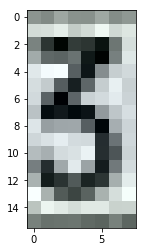

In [11]:
plt.imshow(Images[1])

In [12]:
#value change into half before
i=0

for p in range(0,32):
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    
    for j in range(1,41):
        darker_hsv = img_hsv.copy()
        darker_hsv[:, :, 2] = 0.1*j * darker_hsv[:, :, 2]
        darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_hsv_01v_'+str(j)+'.jpg'
        plt.imsave(filename, darker_img)
    print(filename)
    i+=1
        
    

/host//Can/dpr/outPut2/train/S/S_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/3/3_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/B/B_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/Z/Z_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/V/V_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/H/H_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/A/A_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/L/L_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/2/2_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/0/0_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/4/4_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/G/G_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/M/M_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/6/6_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/C/C_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/9/9_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/P/P_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/J/J_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/8/8_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/E/E_hsv_01v_40.jpg
/host//Can/dpr/outPut2/train/T/T_hsv_01v

In [13]:
#gamma_trans
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)
#chang gamma into half of before
i=0
for p in range(0,32):
    img = Images[i]
    for j in range(1,41):#8 images with gamma
        img_corrected = gamma_trans(img,0.1*j)
    
        filename=train_data_directory+'/'+Labels[i]+'/'+ Labels[i]+'_gamma0'+str(j)+'.jpg'
        plt.imsave(filename, img_corrected)
    print(filename)
    i+=1
        
    




/host//Can/dpr/outPut2/train/S/S_gamma040.jpg
/host//Can/dpr/outPut2/train/3/3_gamma040.jpg
/host//Can/dpr/outPut2/train/B/B_gamma040.jpg
/host//Can/dpr/outPut2/train/Z/Z_gamma040.jpg
/host//Can/dpr/outPut2/train/V/V_gamma040.jpg
/host//Can/dpr/outPut2/train/H/H_gamma040.jpg
/host//Can/dpr/outPut2/train/A/A_gamma040.jpg
/host//Can/dpr/outPut2/train/L/L_gamma040.jpg
/host//Can/dpr/outPut2/train/2/2_gamma040.jpg
/host//Can/dpr/outPut2/train/0/0_gamma040.jpg
/host//Can/dpr/outPut2/train/4/4_gamma040.jpg
/host//Can/dpr/outPut2/train/G/G_gamma040.jpg
/host//Can/dpr/outPut2/train/M/M_gamma040.jpg
/host//Can/dpr/outPut2/train/6/6_gamma040.jpg
/host//Can/dpr/outPut2/train/C/C_gamma040.jpg
/host//Can/dpr/outPut2/train/9/9_gamma040.jpg
/host//Can/dpr/outPut2/train/P/P_gamma040.jpg
/host//Can/dpr/outPut2/train/J/J_gamma040.jpg
/host//Can/dpr/outPut2/train/8/8_gamma040.jpg
/host//Can/dpr/outPut2/train/E/E_gamma040.jpg
/host//Can/dpr/outPut2/train/T/T_gamma040.jpg
/host//Can/dpr/outPut2/train/5/5_g

In [14]:
#######################################################################################################3
########################################################################################################
##########################################################################################################
#projective transformer


In [15]:
#vertically enlarge 1.6times, trans -2,-1 and crop elephant:)
M_crop_elephant = np.array([
    [1.6, 0, -2],
    [0, 1.6, -1]
], dtype=np.float32)

img_cr = cv2.warpAffine(testImages[0],M_crop_elephant,(8,16))

NameError: name 'testImages' is not defined

In [17]:
i=0
M_crop_elephant = np.array([
    [1.6, 0, -2],
    [0, 1.6, -1]
], dtype=np.float32)
for p in range(0,32):
    img = Images[i]
    for j in range(1,9):#8 images with gamma
        M_crop_elephant = np.array([[1.0+0.1*j, 0, -2],[0, 1.0+0.1*j, -1]], dtype=np.float32)
       
        img_elephant = cv2.warpAffine(img, M_crop_elephant, (8,16))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_vertical1' +'_translation2-1_'+str(j)+'.jpg'
        plt.imsave(filename, img_elephant)
    print(filename)
    i+=1

/host//Can/dpr/outPut2/train/S/S_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/3/3_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/B/B_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/Z/Z_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/V/V_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/H/H_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/A/A_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/L/L_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/2/2_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/0/0_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/4/4_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/G/G_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/M/M_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/6/6_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/C/C_vertical1_translation2-1_8.jpg
/host//Can/dpr/outPut2/train/9/9_vertica

In [18]:
#shear transform
#shear angle 15 degree
i=0
theta = 15 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)
img_sheared = cv2.warpAffine(testImages[0], M_shear, (8, 16))
plt.imshow(img_sheared)


NameError: name 'testImages' is not defined

In [19]:
theta = 15 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)
i=0
for p in range(0,32):
    img = Images[i]
    for j in range(1,51):#50 degree max
        theta = 1 *j* np.pi / 180
        M_shear = np.array([[1, np.tan(theta), 0],[0, 1, 0]], dtype=np.float32)
        
    
        img_sheared = cv2.warpAffine(img, M_shear, (8,16))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_sheared'+str(1*j)+'.jpg'
        plt.imsave(filename, img_sheared)
    print(filename)
    i+=1

/host//Can/dpr/outPut2/train/S/S_sheared50.jpg
/host//Can/dpr/outPut2/train/3/3_sheared50.jpg
/host//Can/dpr/outPut2/train/B/B_sheared50.jpg
/host//Can/dpr/outPut2/train/Z/Z_sheared50.jpg
/host//Can/dpr/outPut2/train/V/V_sheared50.jpg
/host//Can/dpr/outPut2/train/H/H_sheared50.jpg
/host//Can/dpr/outPut2/train/A/A_sheared50.jpg
/host//Can/dpr/outPut2/train/L/L_sheared50.jpg
/host//Can/dpr/outPut2/train/2/2_sheared50.jpg
/host//Can/dpr/outPut2/train/0/0_sheared50.jpg
/host//Can/dpr/outPut2/train/4/4_sheared50.jpg
/host//Can/dpr/outPut2/train/G/G_sheared50.jpg
/host//Can/dpr/outPut2/train/M/M_sheared50.jpg
/host//Can/dpr/outPut2/train/6/6_sheared50.jpg
/host//Can/dpr/outPut2/train/C/C_sheared50.jpg
/host//Can/dpr/outPut2/train/9/9_sheared50.jpg
/host//Can/dpr/outPut2/train/P/P_sheared50.jpg
/host//Can/dpr/outPut2/train/J/J_sheared50.jpg
/host//Can/dpr/outPut2/train/8/8_sheared50.jpg
/host//Can/dpr/outPut2/train/E/E_sheared50.jpg
/host//Can/dpr/outPut2/train/T/T_sheared50.jpg
/host//Can/dp

In [20]:
#rotation rotated 15 degree
i=0
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)
i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,41):#max 45
        theta = 1 *j* np.pi / 180
        M_rotate = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0]], dtype=np.float32)
        img_rotated15 = cv2.warpAffine(img, M_rotate, (8,16))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_rotate_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_rotated15)
    print(filename)
    i+=1

/host//Can/dpr/outPut2/train/S/S_rotate_40.jpg
/host//Can/dpr/outPut2/train/3/3_rotate_40.jpg
/host//Can/dpr/outPut2/train/B/B_rotate_40.jpg
/host//Can/dpr/outPut2/train/Z/Z_rotate_40.jpg
/host//Can/dpr/outPut2/train/V/V_rotate_40.jpg
/host//Can/dpr/outPut2/train/H/H_rotate_40.jpg
/host//Can/dpr/outPut2/train/A/A_rotate_40.jpg
/host//Can/dpr/outPut2/train/L/L_rotate_40.jpg
/host//Can/dpr/outPut2/train/2/2_rotate_40.jpg
/host//Can/dpr/outPut2/train/0/0_rotate_40.jpg
/host//Can/dpr/outPut2/train/4/4_rotate_40.jpg
/host//Can/dpr/outPut2/train/G/G_rotate_40.jpg
/host//Can/dpr/outPut2/train/M/M_rotate_40.jpg
/host//Can/dpr/outPut2/train/6/6_rotate_40.jpg
/host//Can/dpr/outPut2/train/C/C_rotate_40.jpg
/host//Can/dpr/outPut2/train/9/9_rotate_40.jpg
/host//Can/dpr/outPut2/train/P/P_rotate_40.jpg
/host//Can/dpr/outPut2/train/J/J_rotate_40.jpg
/host//Can/dpr/outPut2/train/8/8_rotate_40.jpg
/host//Can/dpr/outPut2/train/E/E_rotate_40.jpg
/host//Can/dpr/outPut2/train/T/T_rotate_40.jpg
/host//Can/dp

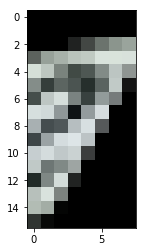

In [25]:
img = Images[0]
rows, cols, ch = img.shape  
  
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])  
pts2 = np.float32([[cols * 0.1, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])  
  
M = cv2.getAffineTransform(pts1, pts2)  
dst = cv2.warpAffine(img, M, (cols, rows))  
  
plt.imshow(dst) 


In [33]:
i=0
for p in range(0,32):
    img = Images[i]
    for j in range(0,500):
        rows, cols, ch = img.shape  
        random_factor1 = random.uniform(-1,1)+1
        random_factor2 = random.uniform(-1,1)+1
        random_factor3 = random.uniform(-1,1)+1
        random_factor4 = random.uniform(-1,1)+1
        random_factor5 = random.uniform(-1,1)+1
        random_factor6 = random.uniform(-1,1)+1
        
        
        pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]]) 
        
        pts2 = np.float32([[cols * 0.1*random_factor1, rows * 0.1*random_factor2],
                           [cols * 0.9*random_factor3, rows * 0.2*random_factor4], 
                           [cols * 0.1*random_factor5, rows * 0.9*random_factor6]])  
          
        M = cv2.getAffineTransform(pts1, pts2)  
        dst = cv2.warpAffine(img, M, (cols, rows))  
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_projective_random'+str(int(j))+'.jpg'
    
        plt.imsave(filename, dst)
        
    print(filename)
    i+=1

/host//Can/dpr/outPut2/train/S/S_projective_random499.jpg
/host//Can/dpr/outPut2/train/3/3_projective_random499.jpg
/host//Can/dpr/outPut2/train/B/B_projective_random499.jpg
/host//Can/dpr/outPut2/train/Z/Z_projective_random499.jpg
/host//Can/dpr/outPut2/train/V/V_projective_random499.jpg
/host//Can/dpr/outPut2/train/H/H_projective_random499.jpg
/host//Can/dpr/outPut2/train/A/A_projective_random499.jpg
/host//Can/dpr/outPut2/train/L/L_projective_random499.jpg
/host//Can/dpr/outPut2/train/2/2_projective_random499.jpg
/host//Can/dpr/outPut2/train/0/0_projective_random499.jpg
/host//Can/dpr/outPut2/train/4/4_projective_random499.jpg
/host//Can/dpr/outPut2/train/G/G_projective_random499.jpg
/host//Can/dpr/outPut2/train/M/M_projective_random499.jpg
/host//Can/dpr/outPut2/train/6/6_projective_random499.jpg
/host//Can/dpr/outPut2/train/C/C_projective_random499.jpg
/host//Can/dpr/outPut2/train/9/9_projective_random499.jpg
/host//Can/dpr/outPut2/train/P/P_projective_random499.jpg
/host//Can/dpr

In [ ]:
#general projective transform
"""
M = np.array([
    [0.1, 0.5, -2],
    [0.5, 0.1, -1]
], dtype=np.float32)

i=0
for p in range(0,32):
    img = Images[i]
    for j in range(0,5):
        M = np.array([[random.uniform(-1,1), -random.uniform(-1,1), random.uniform(-1,1) ],
                      [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1) ]],dtype=np.float32)
        img_projective = cv2.warpAffine(img, M, (8,16))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_projective_random'+str(int(j))+'.jpg'
        plt.imshow(img_projective)
        #plt.imsave(filename, img_projective)
        
    print(filename)
    i+=1
"""

In [ ]:
g=random.uniform(-1,1)
print(g)